# Hurricane Michael

Download the hurricaneMichael.csv and US_states(5m).json files.

Using the geopandas library, turn the latitude and longitude columns into a geographical Point data type then make a geodataframe. Plot the path of Hurricane Michael onto the US map in the GeoJSON file.

Tips

*    After loading the US_states(5m).json file as a geodataframe, use the following code to create a geodataframe that only contains the contiguous United States (48 states):


*    The longitude column data should be turned into negative values(data source listed longitude direction instead of positive/negative). Use the following code to make the data correct:

Feel free to add any additional features to your plot (marker shape, marker color, etc.).

In [1]:
import pandas as pd
import geopandas as gpd #used for transforming geolocation data
import matplotlib.pyplot as plt

from datetime import datetime  #to convert data to datetime that does not fall within the pandas.to_datetime function timeframe
from shapely.geometry import Point  #transform latitude/longitude to geo-coordinate data
from geopandas.tools import geocode #get the latitude/longitude for a given address
from geopandas.tools import reverse_geocode  #get the address for a location using latitude/longitude

%matplotlib inline

### Geocoding and Reverse Geocoding

Geocoding is taking an address for a location and returning its latitudinal and longitudinal coordinates. Reverse geocoding would then be the opposite - taking the latitudinal and longitudinal coordinates for a location and returning the physical address.

In [2]:
#load hurricane data collected 
hurricane_df = pd.read_csv("hurricaneMichael.csv")
hurricane_df.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster
0,1,10/06/2018 17:00,18.0,86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 16:50,Beven
1,1A,10/06/2018 20:00,18.3,86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 19:32,Avila
2,2,10/06/2018 23:00,18.8,86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 22:38,Avila
3,2A,10/07/2018 02:00,18.4,87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/07/2018 01:38,Berg
4,3,10/07/2018 05:00,18.6,86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/07/2018 04:53,Berg


In [3]:
hurricane_df['Long'] = 0 - hurricane_df['Long']

In [4]:
#data type of each column
hurricane_df.dtypes

AdvisoryNumber     object
Date               object
Lat               float64
Long              float64
Wind                int64
Pres                int64
Movement           object
Type               object
Name               object
Received           object
Forecaster         object
dtype: object

In [53]:
len(hurricane_df)

45

In [54]:
#see columns with null values
hurricane_df.count()

AdvisoryNumber    45
Date              45
Lat               45
Long              45
Wind              45
Pres              45
Movement          45
Type              45
Name              45
Received          45
Forecaster        45
coordinates       45
dtype: int64

In [55]:
#make a new column to hold the longitude & latitude as a list
hurricane_df['coordinates'] = list(hurricane_df[['Long', 'Lat']].values)

In [56]:
#see new coordinates column
hurricane_df.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,coordinates
0,1,10/06/2018 17:00,18.0,-86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 16:50,Beven,"[-86.6, 18.0]"
1,1A,10/06/2018 20:00,18.3,-86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 19:32,Avila,"[-86.6, 18.3]"
2,2,10/06/2018 23:00,18.8,-86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 22:38,Avila,"[-86.6, 18.8]"
3,2A,10/07/2018 02:00,18.4,-87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/07/2018 01:38,Berg,"[-87.1, 18.4]"
4,3,10/07/2018 05:00,18.6,-86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/07/2018 04:53,Berg,"[-86.9, 18.6]"


In [57]:
#list values in coordinates column is classified as object type
hurricane_df['coordinates'].dtypes

dtype('O')

In [58]:
#convert the coordinates to a geolocation type
hurricane_df['coordinates'] = hurricane_df['coordinates'].apply(Point)

In [59]:
#coordinates column now has POINT next to each coordinate pair value
hurricane_df.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,coordinates
0,1,10/06/2018 17:00,18.0,-86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 16:50,Beven,POINT (-86.59999999999999 18)
1,1A,10/06/2018 20:00,18.3,-86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 19:32,Avila,POINT (-86.59999999999999 18.3)
2,2,10/06/2018 23:00,18.8,-86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 22:38,Avila,POINT (-86.59999999999999 18.8)
3,2A,10/07/2018 02:00,18.4,-87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/07/2018 01:38,Berg,POINT (-87.09999999999999 18.4)
4,3,10/07/2018 05:00,18.6,-86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/07/2018 04:53,Berg,POINT (-86.90000000000001 18.6)


In [60]:
#coordinates column with geolocation data is just a regular pandas Series type
type(hurricane_df['coordinates'])

pandas.core.series.Series

In [61]:
#create a geolocation dataframe type using the coordinates column as the geolocation data
geo_hurricane = gpd.GeoDataFrame(hurricane_df, geometry='coordinates')

In [62]:
#geo-dataframe looks the same as regular dataframe
geo_hurricane.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,coordinates
0,1,10/06/2018 17:00,18.0,-86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 16:50,Beven,POINT (-86.60000 18.00000)
1,1A,10/06/2018 20:00,18.3,-86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 19:32,Avila,POINT (-86.60000 18.30000)
2,2,10/06/2018 23:00,18.8,-86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/06/2018 22:38,Avila,POINT (-86.60000 18.80000)
3,2A,10/07/2018 02:00,18.4,-87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/07/2018 01:38,Berg,POINT (-87.10000 18.40000)
4,3,10/07/2018 05:00,18.6,-86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/07/2018 04:53,Berg,POINT (-86.90000 18.60000)


In [63]:
#verify coordinates column is geolocation data type
type(geo_hurricane['coordinates'])

geopandas.geoseries.GeoSeries

In [43]:
#import file that contains a US map shape polygons
#will use to plot the coordinates of meteorite landings
filepath = "US_states(5m).json"

#data contains polygon shape coordinates for different map body types (states, etc.)
map_df = gpd.read_file(filepath)
map48 = map_df.loc[map_df['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico']) == False]
map48.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079..."
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213..."
5,0400000US08,08,Colorado,,103641.888,"POLYGON ((-106.19055 40.99761, -106.06118 40.9..."


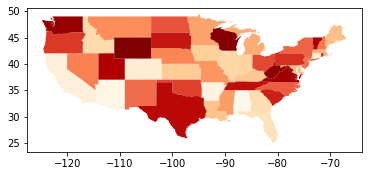

In [47]:
#map graph
map48.plot(cmap='OrRd')

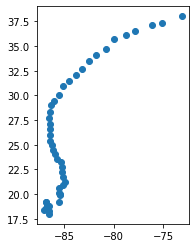

In [48]:
#plot the coordinates (no map)
geo_hurricane.plot()

Text(0.5, 1, 'Hurrican Michael Trajectory')

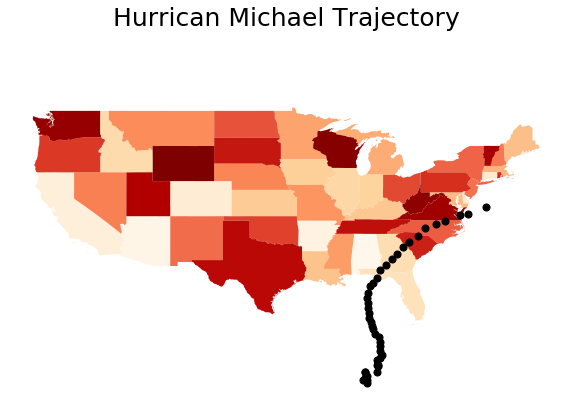

In [49]:
#plot coordinates on top of map graph

#this is to set the size of the borders
fig, ax = plt.subplots(1, figsize=(10,15))

#this is the map , cmap='OrRd'
basemap = map48.plot(ax=ax,  cmap='OrRd')

#plot coordinates on top of map graph
geo_hurricane.plot(ax=basemap, color='black', marker="o", markersize=50)

#take off axis numbers
ax.axis('off')

#put title on map
ax.set_ylim([17, 58])
ax.set_title("Hurrican Michael Trajectory", fontsize=25, fontweight=3)

### We could zoom-in and see the trajectory 

Text(0.5, 1, 'Hurrican Michael Trajectory')

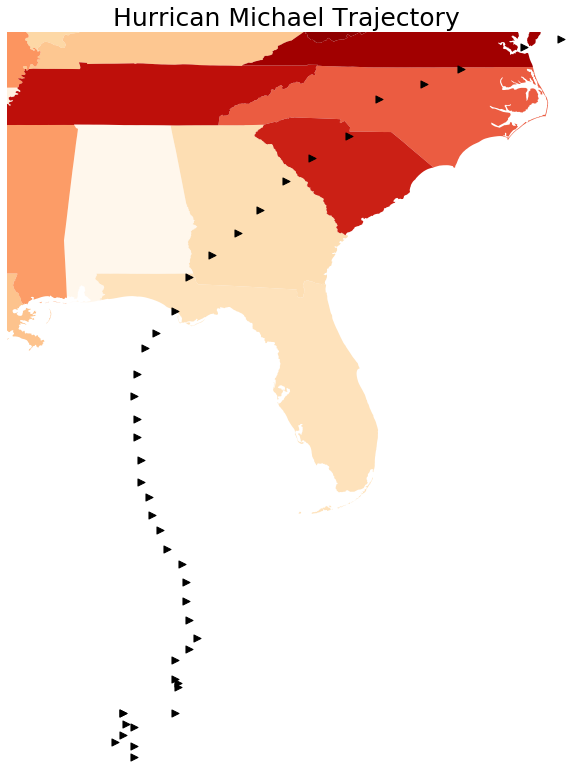

In [52]:
#plot coordinates on top of map graph

#this is to set the size of the borders
fig, ax = plt.subplots(1, figsize=(10,15))

#this is the map , cmap='OrRd'
basemap = map48.plot(ax=ax,  cmap='OrRd')

#plot coordinates on top of map graph
geo_hurricane.plot(ax=basemap, color='black', marker=">", markersize=50)

#take off axis numbers
ax.axis('off')

#put title on map
ax.set_xlim([-90, -75])
ax.set_ylim([17.5, 37.5])
ax.set_title("Hurrican Michael Trajectory", fontsize=25, fontweight=3)